In [1]:
from google.colab import files
files.upload()


Saving twenty.zip to twenty.zip


In [2]:
!unzip twenty.zip

Streaming output truncated to the last 5000 lines.
  inflating: twenty/train/Sample009/_242_7099511.png  
  inflating: twenty/train/Sample009/_242_752793 - Copy.png  
  inflating: twenty/train/Sample009/_242_752793.png  
  inflating: twenty/train/Sample009/_242_7967919.png  
  inflating: twenty/train/Sample009/_242_8996808.png  
  inflating: twenty/train/Sample009/_243_2829224.png  
  inflating: twenty/train/Sample009/_243_3944350.png  
  inflating: twenty/train/Sample009/_243_4384461 - Copy.png  
  inflating: twenty/train/Sample009/_243_4384461.png  
  inflating: twenty/train/Sample009/_243_5847475 - Copy.png  
  inflating: twenty/train/Sample009/_243_5847475.png  
  inflating: twenty/train/Sample009/_243_5898601 - Copy.png  
  inflating: twenty/train/Sample009/_243_5898601.png  
  inflating: twenty/train/Sample009/_243_7888484.png  
  inflating: twenty/train/Sample009/_243_8413214.png  
  inflating: twenty/train/Sample009/_245_1339053.png  
  inflating: twenty/train/Sample009/_245_13

In [0]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import numpy as np
import matplotlib.pyplot as plt
import cv2
import os
from datetime import datetime

In [207]:
train_dir='/content/twenty/train'
categories=os.listdir(train_dir)
categories

['Sample018',
 'Sample002',
 'Sample007',
 'Sample013',
 'Sample009',
 'Sample171',
 'Sample012',
 'Sample014',
 'Sample006',
 'Sample052',
 'Sample154',
 'Sample086',
 'Sample035',
 'Sample120',
 'Sample011',
 'Sample003',
 'Sample001',
 'Sample137',
 'Sample005',
 'Sample103',
 'Sample010',
 'Sample004',
 'Sample069']

In [208]:
train_gen = ImageDataGenerator(rescale=1./255)

img_shape=128

train_batches = train_gen.flow_from_directory(batch_size=25,
                                              directory=train_dir,
                                                     shuffle=True,
                                                     target_size=(img_shape,img_shape),
                                                     class_mode='categorical')

Found 6325 images belonging to 23 classes.


In [209]:
val_gen = ImageDataGenerator(rescale=1./255)
val_dir='/content/twenty/val'
val_batches = val_gen.flow_from_directory(batch_size=25,
                                          directory = val_dir,
                                          shuffle=True,
                                          target_size=(img_shape,img_shape),
                                                     class_mode='categorical')

Found 575 images belonging to 23 classes.


In [0]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(8, (2,2), activation='relu', input_shape=(128,128, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Dropout(0.2),

    tf.keras.layers.Conv2D(16, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.3),

    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.2),

    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.2),

    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(23,activation='softmax')
])

In [250]:
model.summary()

Model: "sequential_67"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_305 (Conv2D)          (None, 127, 127, 8)       104       
_________________________________________________________________
max_pooling2d_303 (MaxPoolin (None, 63, 63, 8)         0         
_________________________________________________________________
dropout_229 (Dropout)        (None, 63, 63, 8)         0         
_________________________________________________________________
conv2d_306 (Conv2D)          (None, 61, 61, 16)        1168      
_________________________________________________________________
max_pooling2d_304 (MaxPoolin (None, 30, 30, 16)        0         
_________________________________________________________________
dropout_230 (Dropout)        (None, 30, 30, 16)        0         
_________________________________________________________________
conv2d_307 (Conv2D)          (None, 28, 28, 32)      

In [0]:
model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss=tf.keras.losses.categorical_crossentropy,
              metrics=['accuracy'])

In [11]:
train_batches.class_indices

{'Sample001': 0,
 'Sample002': 1,
 'Sample003': 2,
 'Sample004': 3,
 'Sample005': 4,
 'Sample006': 5,
 'Sample007': 6,
 'Sample009': 7,
 'Sample010': 8,
 'Sample011': 9,
 'Sample012': 10,
 'Sample013': 11,
 'Sample014': 12,
 'Sample018': 13,
 'Sample035': 14,
 'Sample052': 15,
 'Sample069': 16,
 'Sample086': 17,
 'Sample103': 18,
 'Sample120': 19,
 'Sample137': 20,
 'Sample154': 21,
 'Sample171': 22}

In [254]:
epoc=10
history = model.fit(
    train_batches,
    epochs=epoc,
    validation_data=val_batches)

Epoch 1/10
253/253 [==============================] - 13s 51ms/step - loss: 0.2291 - accuracy: 0.9195 - val_loss: 0.2656 - val_accuracy: 0.9165
Epoch 2/10
253/253 [==============================] - 13s 50ms/step - loss: 0.2464 - accuracy: 0.9162 - val_loss: 0.2562 - val_accuracy: 0.9235
Epoch 3/10
253/253 [==============================] - 13s 50ms/step - loss: 0.2303 - accuracy: 0.9246 - val_loss: 0.2437 - val_accuracy: 0.9235
Epoch 4/10
253/253 [==============================] - 12s 49ms/step - loss: 0.2183 - accuracy: 0.9273 - val_loss: 0.2460 - val_accuracy: 0.9322
Epoch 5/10
253/253 [==============================] - 13s 49ms/step - loss: 0.1838 - accuracy: 0.9380 - val_loss: 0.2430 - val_accuracy: 0.9304
Epoch 6/10
253/253 [==============================] - 13s 51ms/step - loss: 0.1965 - accuracy: 0.9347 - val_loss: 0.2678 - val_accuracy: 0.9113
Epoch 7/10
253/253 [==============================] - 13s 52ms/step - loss: 0.1917 - accuracy: 0.9360 - val_loss: 0.2045 - val_accuracy:

In [13]:
from google.colab import files
files.upload()

Saving xyx.zip to xyx.zip


{'xyx.zip': b'PK\x03\x04\x14\x00\x00\x00\x08\x00\xd2J\xc5P.\xc7l\xf9\xcd\x18\x00\x00J\x19\x00\x00\x15\x00\x00\x00xyx/img1_1_1 (1).jpegMX\t<T\xfd\xd7\x1f\xd9M\x1a\xfb\xce\x94%\xd9\xf2\xa4\x84\xc8<\x92\xfd\x91V;\x93$[\xccCY\xcapC\xc8\x96\xa5\xa2\x88\t)\xa5\x9ad\xcd6\x0cE$\x8f%\xeb\x831\x93B\x96;\xd4t\x99;3\xef\xed\xff\x7f\xdf\xcf\xe7\xfd\xcd\xdd\xe6s\xef\xef\x9c\xdf=\xdfs\xce\xf7\x9c\xcb\x9b\xe0\xd1P\x12\x8e\xb6\x0e\xb6(>>\x14\x8a\x0f\xf9\xa1x\xd3(k\xd4\x0e\xbe\xdf\xe3\xf7q\xc7\xef!\xc0\xff\xfb(( \xc0/ $($\xf4\x9f]XT\x04\xd9\x85\x85\x84D\xd0"\xa2b\xbf\x07r\xb5\x13-\xb6\xf3\xf7\x1f^\x07\n-\x82\xba\x81\xba\xc1\xc7\'\x89\xe2u\xa3\xb0\x88p\xc1\xff\xc8D4\xfcw\xf0\xed\xe0\x17\x10\x14\x12F\xe6\xa2\x91\x07\xea%\x10\x9d\xfc\xfc\x88&AD\rr7\x1e\xb9\x8f\x12\x90\x14\x94\xdas\xc0JH\xfa\x94\x9f\xb0z\x84\x8cQb^\x99\x88\xc6\xb1\x9aN\xd9\xd3C\xa0\xe6\xc1\x0b\x91I\xa2br\xf2\n\x8aJZ{\xb5\xf7\xe9\xe8\x1e2>lbjv\xc4\xfa\xb8\x8d\xad\x9d\xbd\x83\xe3\x99\xb3\xe7\\\xdd\xdc=<\xfd/\x06\\\n\x0c\n\x0e\xb9r5*:&\xf6\xda

In [14]:
!unzip xyx.zip

Archive:  xyx.zip
  inflating: xyx/img1_1_1 (1).jpeg   
  inflating: xyx/img1_1_1 (2).jpeg   
  inflating: xyx/img1_1_1 (3).jpeg   
  inflating: xyx/img1_1_2 (1).jpeg   
  inflating: xyx/img1_1_2 (2).jpeg   
  inflating: xyx/img1_1_2.jpeg       
  inflating: xyx/img1_2_1 (1).jpeg   
  inflating: xyx/img1_2_1.jpeg       
  inflating: xyx/img1_2_2 (1).jpeg   
  inflating: xyx/img1_2_2 (2).jpeg   
  inflating: xyx/img1_2_2.jpeg       
  inflating: xyx/img1_2_3.jpeg       
  inflating: xyx/img1_2_4.jpeg       
  inflating: xyx/img1_3_1.jpeg       
  inflating: xyx/img1_3_2.jpeg       


In [0]:
test = cv2.imread('/content/xyx/img1_2_1 (1).jpeg')

img = cv2.resize(test,(128,128))

img = np.reshape(img,[1,128,128,3])

a=np.argmax(model.predict(img))

In [0]:
class_names = np.array(['ಅ','ಆ','ಇ','ಈ','ಉ','ಊ','ಋ','ಎ','ಏ','ಐ','ಒ','ಓ','ಔ','ಕ','ಖ','ಗ','ಘ','ಙ','ಚ','ಛ','ಜ','ಝ','ಞ'])
class_names

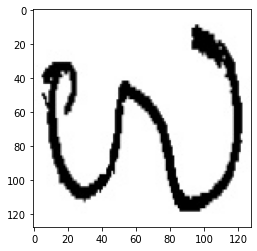

In [278]:
plt.imshow(test)

In [279]:
class_names[a]

'ಊ'

In [0]:
model.save("final_proj_05-06-2020(try1).h5")